In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# Import external RF data
i = 0
output = {}
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_0dbm.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_0dbm.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    freq, output[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                 skip_header = 29, unpack = True)

In [4]:
# Import VCO data
i = 0
vco = {}
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_vco.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_vco.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    try:
        freq_vco, vco[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        vco[unit_tag]+=30
    except OSError:
        continue

In [8]:
# Import Harmonic Data
i = 0
Harm = {}
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm.DAT'
    p_tag = '1,'+str(i*5)
    try:
        freq_1st, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except OSError:
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_2ndH.DAT'
    p_tag = '2,'+str(i*5)
    try:
        freq_2nd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except OSError:
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_3rdH.DAT'
    p_tag = '3,'+str(i*5)
    try:
        freq_3rd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except OSError:
        continue

C:\Users\dsb1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: genfromtxt: Empty input file: "unit29_5dbm.DAT"
  if __name__ == '__main__':


ValueError: not enough values to unpack (expected 3, got 0)

In [30]:
i = 0
output_2d = np.array([output[tag] for tag in output.keys()])

In [21]:
WattLine = np.array([30 for i in range(len(freq))])

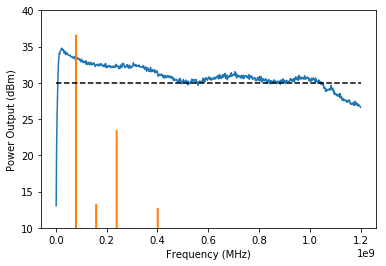

In [78]:
tag = '08'
plt.figure(1)
plt.plot(freq, output[tag], '-')
if tag in vco.keys():
    plt.plot(freq_vco, vco[tag], '-')
plt.plot(freq, WattLine, 'k--')
plt.ylim(10,40)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Output (dBm)')
plt.show()

In [39]:
pwr_avg = np.mean(output_2d, axis = 0)
pwr_std = np.std(output_2d, axis = 0)

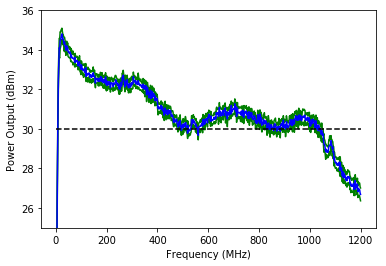

In [55]:
plt.figure(2)
plt.plot(freq/(10**6), pwr_avg+pwr_std, 'g-')
plt.plot(freq/(10**6), pwr_avg-pwr_std, 'g-')
plt.plot(freq/(10**6), pwr_avg, 'b-')
plt.plot(freq/(10**6), WattLine, 'k--')
plt.ylim(25,36)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Output (dBm)')
plt.show()